In [1]:
from cv2 import cv2
import numpy as np
import pickle
import requests
import io
import os
%matplotlib inline
import matplotlib.pyplot as plt
from moviepy.editor import *
from scipy.ndimage import gaussian_filter
answers = {}

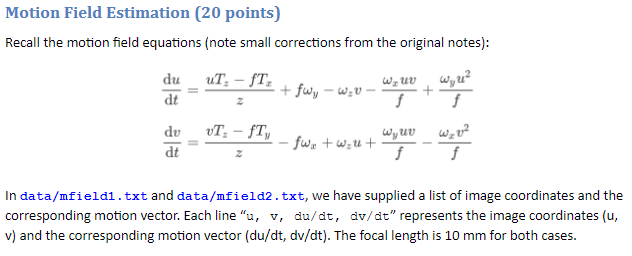

In [2]:
# load data
response = requests.get('https://github.com/qchenclaire/computer-vision-fall-2020/raw/master/HW3/data/mfield1.txt')
response.raise_for_status()
mfield1 = np.loadtxt(io.BytesIO(response.content))

response = requests.get('https://github.com/qchenclaire/computer-vision-fall-2020/raw/master/HW3/data/mfield2.txt')
response.raise_for_status()
mfield2 = np.loadtxt(io.BytesIO(response.content))

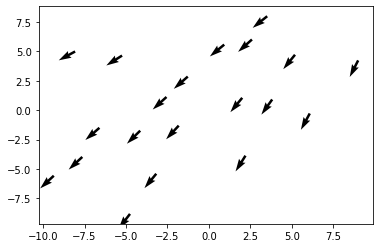

In [3]:
for v in mfield1:
  plt.quiver(v[0], v[1], v[2], v[3])

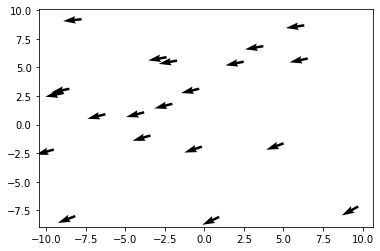

In [4]:
mfld2 = mfield2.copy()
w = [0.1, 0.2, 0.3]
f = 10

for p in mfld2:
  c_x = f*w[1] - w[2]*p[1] - (w[0]*p[0]*p[1])/f + (w[1]*p[0]**2)/f
  p[2] = p[2] - c_x

  c_y = -f*w[0] + w[2]*p[0] + (w[1]*p[0]*p[1])/f - (w[0]*p[1]**2)/f
  p[3] = p[3] - c_y

for v in mfld2:
  plt.quiver(v[0], v[1], v[2], v[3])

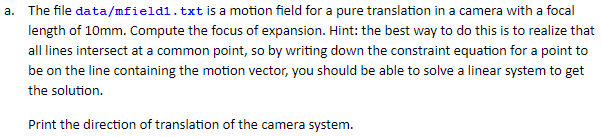

In [5]:
# a
answers['MF'] = {}
answers['MF']['a'] = {}

f = 10

i = 0
j = 5

p = mfield1[i]
q = mfield1[j]

A = np.array([[p[2], -q[2]], [p[3], -q[3]]])
b = np.array([-p[0] + q[0], -p[1] + q[1]])

l1, l2 = np.linalg.lstsq(A, b)[0]


foe = np.array([p[0] + l1*p[2], p[1] + l1*p[3]])
print("focus of expansion = ", foe)
answers['MF']['a']['foe'] = foe

# TODO: translation should be a unit vector, an array of shape(3,)
translation = np.array([foe[0] / f, foe[1] / f, 1])
translation /= np.linalg.norm(translation)
print("translation = ", translation)
answers['MF']['a']['translation'] = translation

focus of expansion =  [16. 18.]
translation =  [0.61357199 0.69026849 0.38348249]


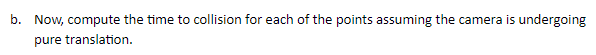

We know that for each point:

$
v = \frac{V_Z}{Z}(p_0 - p)
$

Where $p_0$ is the focus of expansion that we found in the last problem. Since we have 2 coordinates for each point, we only need to chose one to calculate the time to impact for each point. However, we can calculate both and make sure that they are close to ensure that we have done the calculations correctly up to this point.

In [6]:
# b
answers['MF']['b'] = {}

t = []
for p in mfield1:
  t_1 = p[2] / (foe[0] - p[0])
  t_2 = p[3] / (foe[1] - p[1])
  t.append(-1/t_1)

t = np.array(t)

# TODO: an array of (20,)
time_collision = t
print("time to collision = ", time_collision)
answers['MF']['b']['time_collision'] = time_collision

time to collision =  [5.39701197 4.61079523 0.37932793 2.71853071 1.75569237 5.70174597
 2.84518581 4.30098548 5.28852458 0.78942405 2.96205317 0.65455632
 2.11038528 5.86048596 4.43684528 2.72184114 2.57573883 1.20675204
 4.35169011 4.43002191]


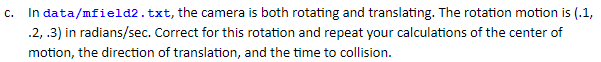

We use the same approach as before, except that we add a constants according to each of the optical flow constraints.

In [7]:
mfld2 = mfield2.copy()
w = [0.1, 0.2, 0.3]


for p in mfld2:
  c_x = f*w[1] - w[2]*p[1] - (w[0]*p[0]*p[1])/f + (w[1]*p[0]**2)/f
  p[2] = p[2] - c_x

  c_y = -f*w[0] + w[2]*p[0] + (w[1]*p[0]*p[1])/f - (w[0]*p[1]**2)/f
  p[3] = p[3] - c_y

# c
answers['MF']['c'] = {}


i = 0
j = 10

p = mfld2[i]
q = mfld2[j]

A = np.array([[p[2], -q[2]], [p[3], -q[3]]])
b = np.array([-p[0] + q[0], -p[1] + q[1]])

l1, l2 = np.linalg.lstsq(A, b)[0]

# TODO: foe should be an array of shape (2,)
foe = np.array([p[0] + l1*p[2], p[1] + l1*p[3]])
print("focus of expansion = ", foe)

# TODO: tranlsation should be a unit vector, an array of shape(3,)
translation = np.array([foe[0] / f, foe[1] / f, 1])
translation /= np.linalg.norm(translation)
print("translation = ", translation)

# TODO: an array of (20,)
t = []
for p in mfld2:
  t_1 = p[2] / (foe[0] - p[0])
  t_2 = p[3] / (foe[1] - p[1])
  t.append(-1/t_1)

t = np.array(t)

time_collision = t
print("time to collision = ", time_collision)

answers['MF']['c']['foe'] = foe
answers['MF']['c']['translation'] = translation
answers['MF']['c']['time_collision'] = time_collision

focus of expansion =  [50. 15.]
translation =  [0.94072087 0.28221626 0.18814417]
time to collision =  [22.75894777 20.68179232  2.86130306  6.7954655   5.61002348 15.88213466
 21.61518049 25.09655433 16.67313403 24.38280201 21.88221069 13.27129155
 27.26915166 28.33894418 24.34329096 24.03791468  3.4024239   8.88409508
 15.24377196 10.33740839]


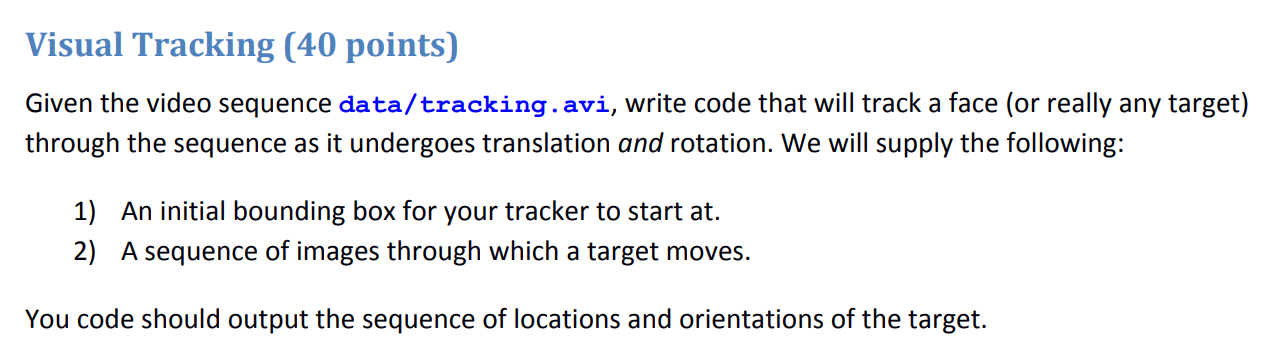

In [8]:
# download video
if not os.path.exists('tracking.avi'):
  ! wget https://github.com/qchenclaire/computer-vision-fall-2020/raw/master/HW3/data/tracking.avi

# play the video
path ="tracking.avi" 
clip = VideoFileClip(path)
clip.ipython_display()

100%|█████████▉| 650/651 [00:02<00:00, 248.68it/s]


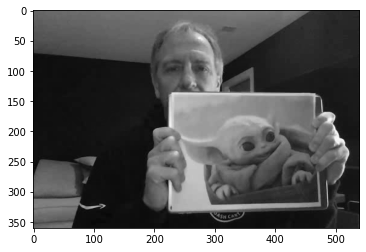

In [9]:
# load video into a generator of images
def v2i(filename, scale=1):
  cap = cv2.VideoCapture(filename)
  while(True):
    ret, frame = cap.read()
    if ret: 
      frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
      frame = cv2.resize(frame, (frame.shape[1] // scale, frame.shape[0] // scale))
      yield frame
    else: break

# show first frame
# downsample scale. If the motion is too large you may want to downsample the image. But for autograding, keep scale as 1
scale = 1
video = v2i('tracking.avi', scale)
frame0 = next(video)
plt.imshow(frame0, cmap = 'gray')

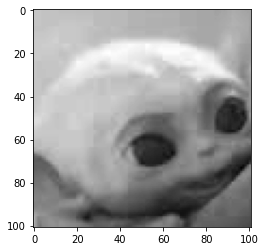

In [10]:
def crop_rotated(image, center, window_size, angle):

  """ Crops a region from image centered about center, of size window_size, and 
      at angle angle.
      Args:
        image: Image to be cropped, of shape [height, width, channels]
        center: Center of crop, (col index, row index))
        window_size: Size of window to crop, of shape tuple (int, int)
        angle: Angle of window to crop, int. The angle is in degree and a positive angle rotates the box clockwisely.
      Returns:
        image_crop: Cropped rotated image about center and at angle
                    shape should be [window_size[0], window_size[1], channels]
  """

  # Formats the inputs to the required format
  center, window_size = tuple(map(int, center)), tuple(map(int, window_size))

  # Get the shape of the image 
  height, width = image.shape[0], image.shape[1]

  # Calculate the rotation matrix about the center provided
  M = cv2.getRotationMatrix2D(center, angle, 1)

  # Rotate the original image
  image_rot = cv2.warpAffine(image, M, (width, height))

  # Crop from the rotated image
  image_crop = cv2.getRectSubPix(image_rot, window_size, center)

  return image_crop


# show target of the first frame
d0 = np.array([350., 210.]) / scale
s = (101 / scale, 101 / scale)
theta0 = 0
tgt = crop_rotated(frame0, d0, s, theta0)
plt.imshow(tgt, cmap='gray')

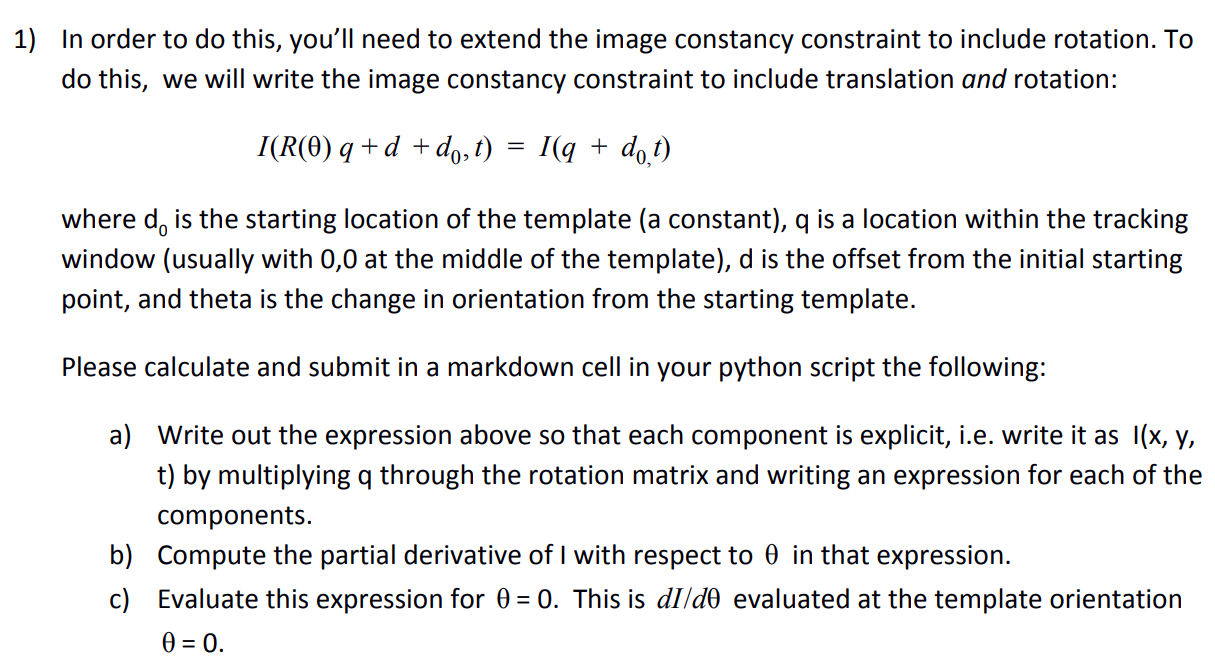

a) We can expand everything out into matrix form

$$
  I(
  \begin{bmatrix} 
    cos(\theta) & -sin(\theta) \\
    sin(\theta) & cos(\theta)
  \end{bmatrix}
  \begin{bmatrix} 
    q_x \\
    q_y
  \end{bmatrix}
  +
  \begin{bmatrix} 
    d_x \\
    d_y
  \end{bmatrix}
  +
  \begin{bmatrix} 
    p_x \\
    p_y
  \end{bmatrix}
  , t
  ) \\ \\
  = 
  I(
  \begin{bmatrix} 
    cos(\theta)q_x - sin(\theta)q_y + d_x + p_x\\
    sin(\theta)q_x + cos(\theta)q_y + d_y + p_y
  \end{bmatrix}
  , t
  ) \\
  = 
  I(cos(\theta)q_x - sin(\theta)q_y + d_x + p_x, sin(\theta)q_x + cos(\theta)q_y + d_y + p_y, t)
  $$

b) We can use the chain rule to calculate the derivative. We obtain expressions for the partial of I w.r.t. the directions x and y. We cannot further simplify these since they depend of the image.

$$
  \frac{\partial I}{\partial \theta} = \frac{\partial I}{\partial x}\frac{\partial x}{\partial \theta} + \frac{\partial I}{\partial y}\frac{\partial y}{\partial \theta} \\
  = (\frac{\partial I}{\partial x})(-sin(\theta)q_x - cos(\theta)q_y) + (\frac{\partial I}{\partial y})(cos(\theta)q_x - sin(\theta)q_y)
$$

c) 

$$
  \frac{dI}{d\theta}\vert_{\theta=0} = -\frac{\partial I}{\partial x}q_y + \frac{\partial I}{\partial y}q_x
$$

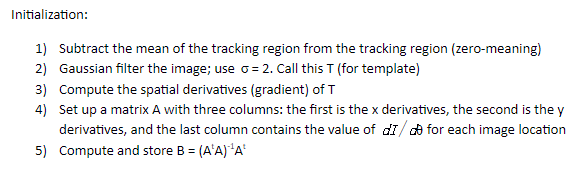

In [11]:
# initialization 1: Subtract the mean of the tracking region from the tracking region (zero-meaning)
# TODO: array of (101, 101)
normalized_tgt = tgt - tgt.mean()

# do not modify answers format
answers['Tracking'] = {}
answers['Tracking']['init1'] = normalized_tgt.sum()

In [12]:
# initialization 2: Gaussian filter the image; use = 2. Call this T (for template)
# TODO: array of (101, 101)
T = gaussian_filter(normalized_tgt, 2)
answers['Tracking']['init2'] = T.sum()

In [13]:
# initialization 3: Compute the spatial derivatives (gradient) of T

# TODO: gy, gx are both array of (101, 101), use np.gradient()
gy, gx= np.gradient(T)

answers['Tracking']['init3'] = {}
answers['Tracking']['init3']['gx'] = gx.sum()
answers['Tracking']['init3']['gy'] = gy.sum()

In [14]:
# initialization 4: Set up a matrix A with three columns: 
# TODO: 
r = np.expand_dims(np.arange(-50, 51, 1), 0)
m = np.ones((1,101))
x_ind = m.T * r
y_ind = r.T * m

gtheta = -gx * y_ind + gy * x_ind

A = np.array([gx.flatten(), gy.flatten(), gtheta.flatten()]).T
# A = np.array([gx.flatten(), gy.flatten()]).T
answers['Tracking']['init4'] = A.sum()

In [15]:
# initialization 5: Compute and store B
# TODO:
import scipy.linalg

B = scipy.linalg.inv(A.T @ A) @ A.T
answers['Tracking']['init5'] = B.sum()

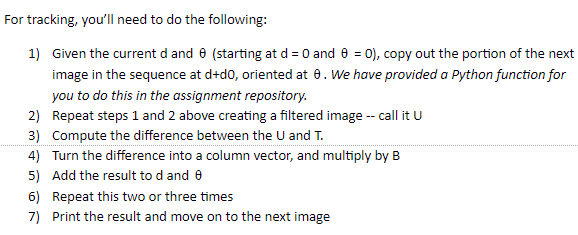

In [16]:
# utility function to draw rotated box on image
def center_to_corner_box2d(center, dim, angle):
    """ change box representation from (center, dimension, angle) to coordinates of four corners
      Args:
        center: (col index, row index)
        dim: (width, height)
        angle: Angle of window to crop, int. The angle is in radian and a positive angle rotates the box clockwisely.
      Returns:
        corners: 4 x 2 array and each row is a corner coordinate
  """ 
    corners = np.array([[-0.5, -0.5], [-0.5, 0.5], [0.5, 0.5], [0.5, -0.5]])
    corners[:, 0] *= dim[0] 
    corners[:, 1] *= dim[1]
    c, s = np.cos(-angle), np.sin(-angle)
    R = np.array(((c, -s), (s, c)))
    corners = (R @ corners.T).T
    corners[:, 0] += center[0]
    corners[:, 1] += center[1]
    return corners
    
    

In [17]:
# tracking
video = v2i('tracking.avi', scale)
ori_video = v2i('tracking.avi')
d = np.zeros_like(d0)
theta = 0
d_seq = []
theta_seq = []


# store output video for demo
out = []
while True:
  try:
      frame = next(video)
      # TODO: 1) - 7)
      for i in range(3):
          est = crop_rotated(frame, d + d0, s, theta * 180 / np.pi)
          U = gaussian_filter(est - est.mean(), 2)
          diff = np.array([(T - U).flatten()]).T
          update = B @ diff

          d = d + update.T[0, :2]
          theta = theta + update.T[0, 2]
      
      # draw box on video for demo
      ori_frame = next(ori_video)
      box_corner = center_to_corner_box2d((d0+d) * scale, (s[0] * scale, s[1] * scale), theta0+theta)
      cv2.drawContours(ori_frame,[box_corner.astype(int)],0,(0,0,255),2)
      out.append(ori_frame)


      d_seq.append(d)
      theta_seq.append(theta)
  except:
    break

    
# array of (650, 2)
d_seq = np.vstack(d_seq)
# array of (650,)
theta_seq = np.array(theta_seq)
answers['Tracking']['d_seq'] = d_seq[10::50]
answers['Tracking']['theta_seq'] = theta_seq[10::50]

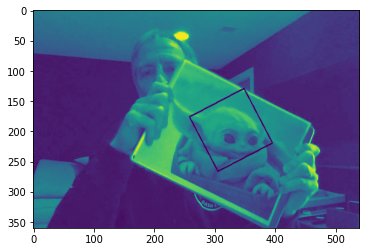

In [18]:
# video conversion doesn't work for some reason, I just plot the frames
plt.imshow(out[299])

In [19]:
# show expected results of the first 50 frames(demo is in BGR but doesn't matter). You need to do the full video.
if not os.path.exists('demo.avi'):
  ! wget https://github.com/qchenclaire/computer-vision-fall-2020/raw/master/HW3/demo.avi

# play the video
path ="demo.avi" 
clip = VideoFileClip(path)
clip.ipython_display()

--2020-12-05 21:28:45--  https://github.com/qchenclaire/computer-vision-fall-2020/raw/master/HW3/demo.avi
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/qchenclaire/computer-vision-fall-2020/master/HW3/demo.avi [following]
--2020-12-05 21:28:45--  https://raw.githubusercontent.com/qchenclaire/computer-vision-fall-2020/master/HW3/demo.avi
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29169702 (28M) [application/octet-stream]
Saving to: ‘demo.avi’

demo.avi            100%[===================>]  27.82M  53.4MB/s    in 0.5s    

2020-12-05 21:28:46 (53.4 MB/s) - ‘demo.avi’ saved [29169702/29169702]



 98%|█████████▊| 50/51 [00:00<00:00, 294.82it/s]


In [20]:
# finally submit your answers.pickle and HW3.ipynb. Please do not miss either file or add extra files. Wait for some time for answers.pkl to appear in your folder. Yay! This is the end of all the homeworks!
pickle.dump(answers, open('answers.pkl', 'wb'))